# matplotlib
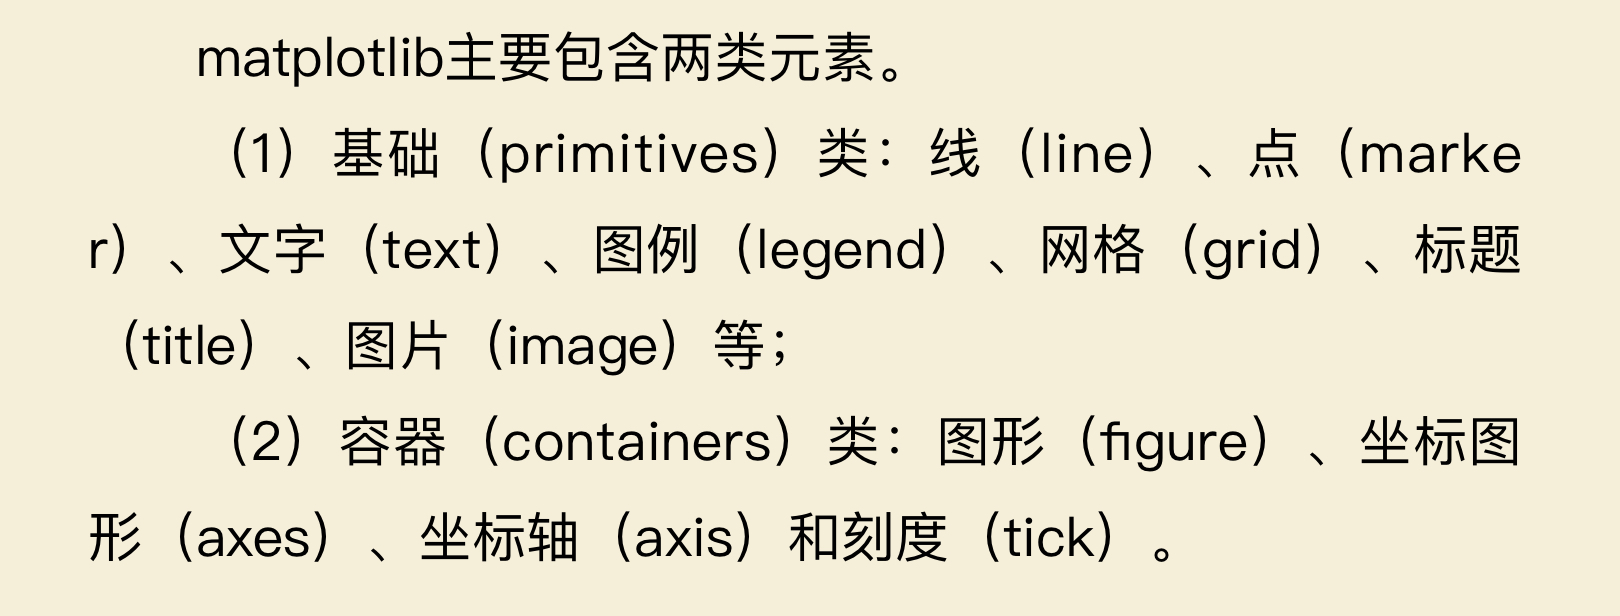

In [9]:
import matplotlib.pyplot as plt

# 子图的绘制
1. 多坐标系（axes）； 多幅子图（subplot）；
2. 用plt绘制多幅子图和坐标系主要有两种方式，在大多数情况下相等，axes可以是不规则的，sobplot必须是规则的，下列1-3方法最常用。
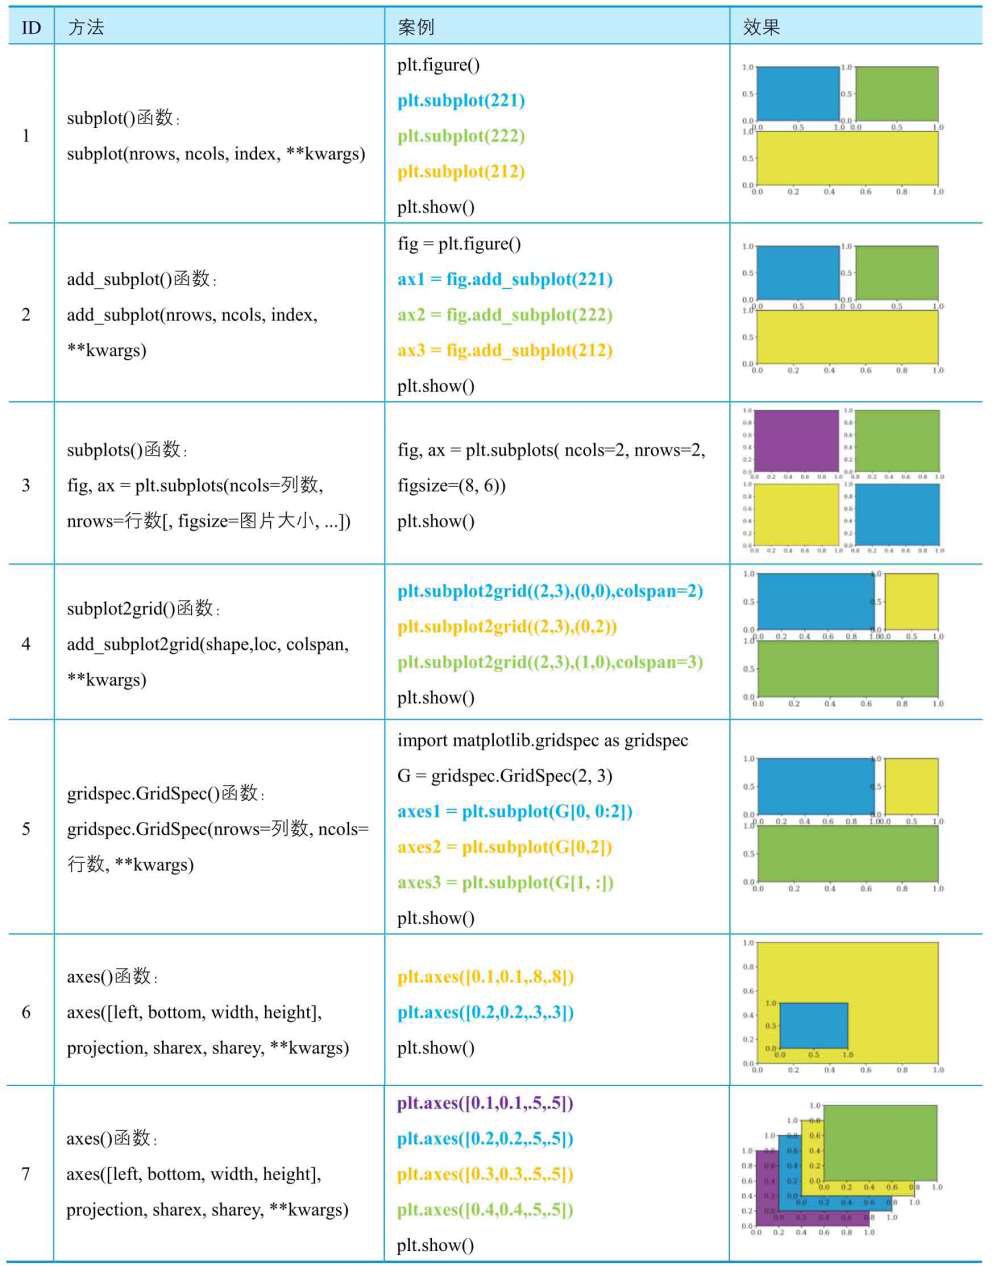

## 单一子图的绘制
### fig = plt.figure()  fig.add_subplot()
1. cartopy绘制底图；

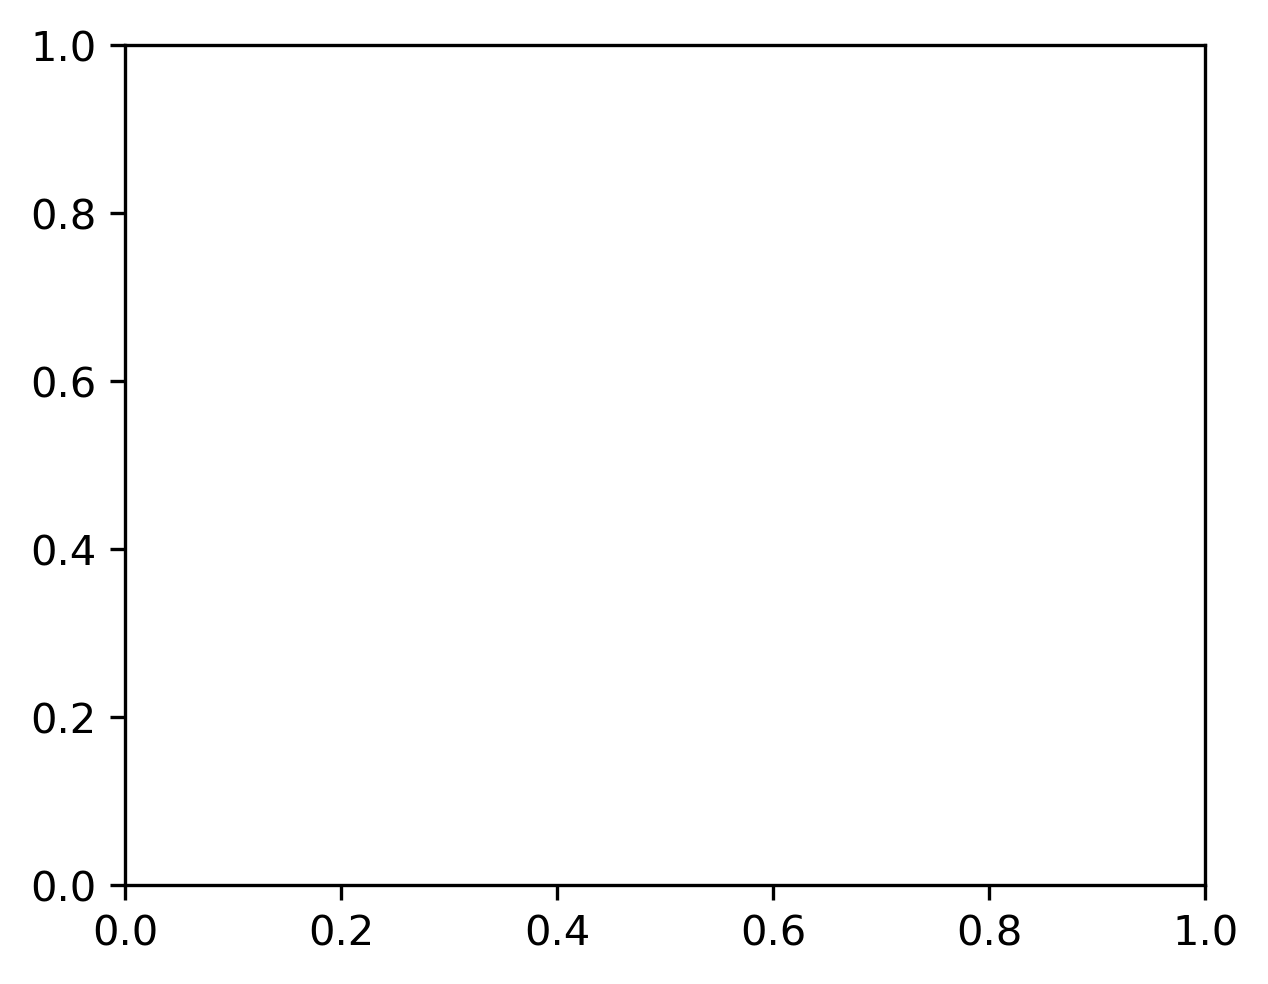

In [5]:
fig = plt.figure(1, dpi=300, figsize=(6, 4))
axes = fig.add_subplot(111)
# wspace 子图横向间距， hspace 代表子图间的纵向距离，left 代表位于图像不同位置
plt.subplots_adjust(left=0.2, bottom=0.15, right=0.8,
                    top=0.85, wspace=None, hspace=None)
plt.show()

### fig = plt.figure()  fig.add_axes()
1. 画布上添加坐标系
2. 画布上画colorbar
> [left, bottom, length, width]

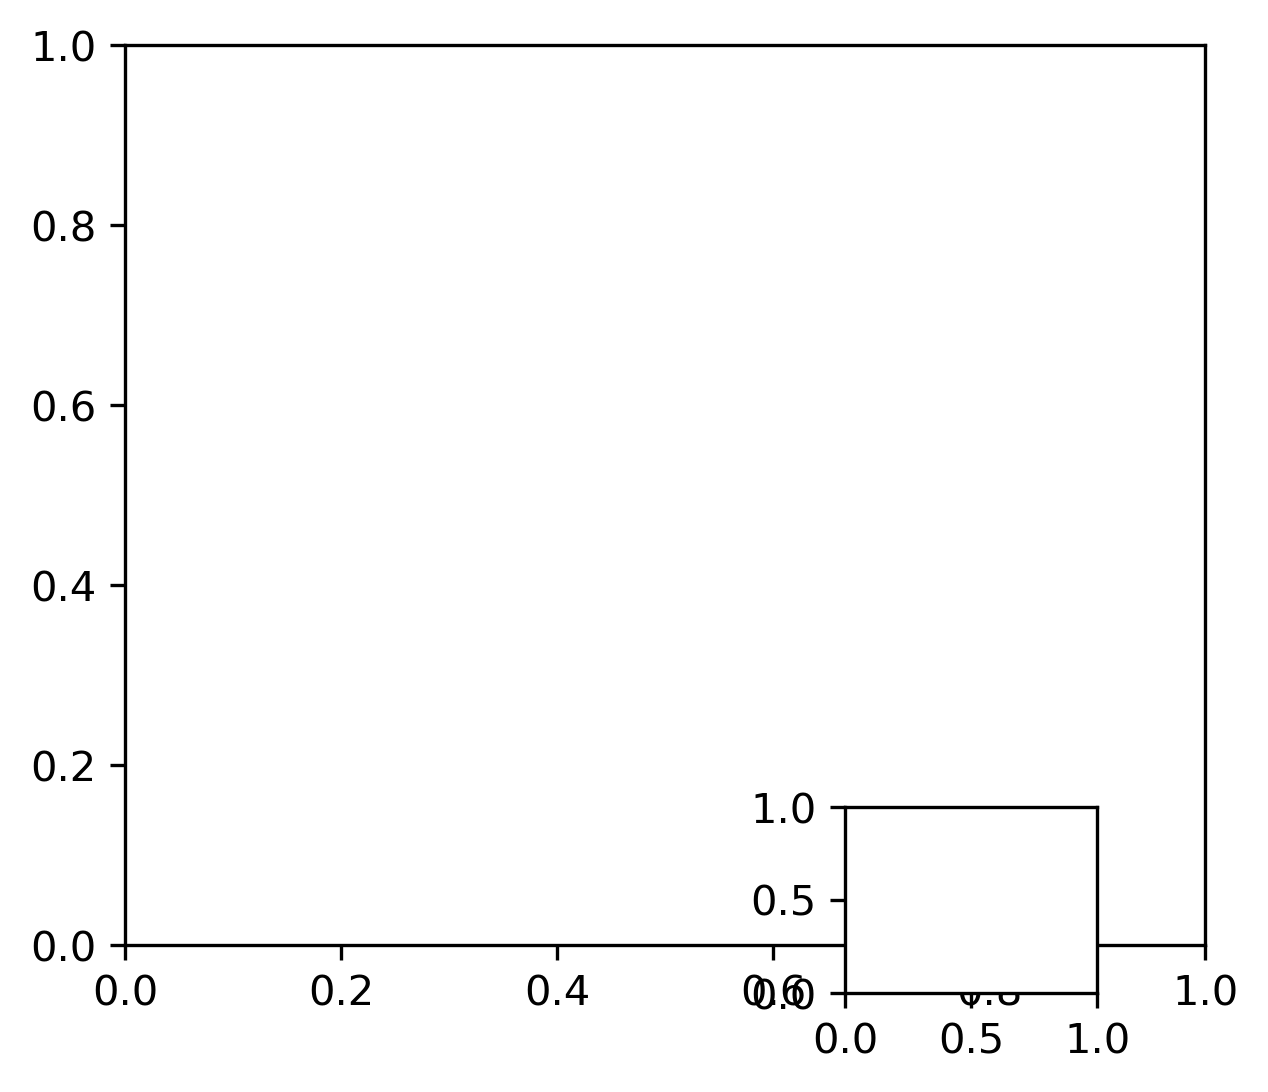

In [8]:
fig = plt.figure(1, dpi=300, figsize=(6, 4))
ax = fig.add_axes([0.2, 0.15, 0.6, 0.75])
sub_ax = fig.add_axes([0.6, 0.11, 0.14, 0.155])
# wspace 子图横向间距， hspace 代表子图间的纵向距离，left 代表位于图像不同位置
plt.show()

## 多子图绘制
### fig, axes = plt.subplots()

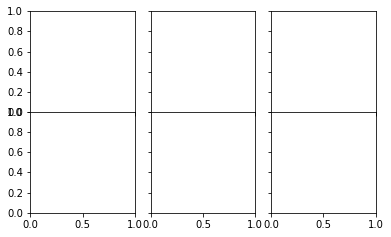

In [22]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.1, bottom=0.15, right=0.9,
                    top=0.85, wspace=0.15, hspace=0)
plt.show()

### 不均匀子图绘制
> [matplotlib中subplot不均匀的绘图](https://blog.csdn.net/weixin_40244676/article/details/104118970)

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

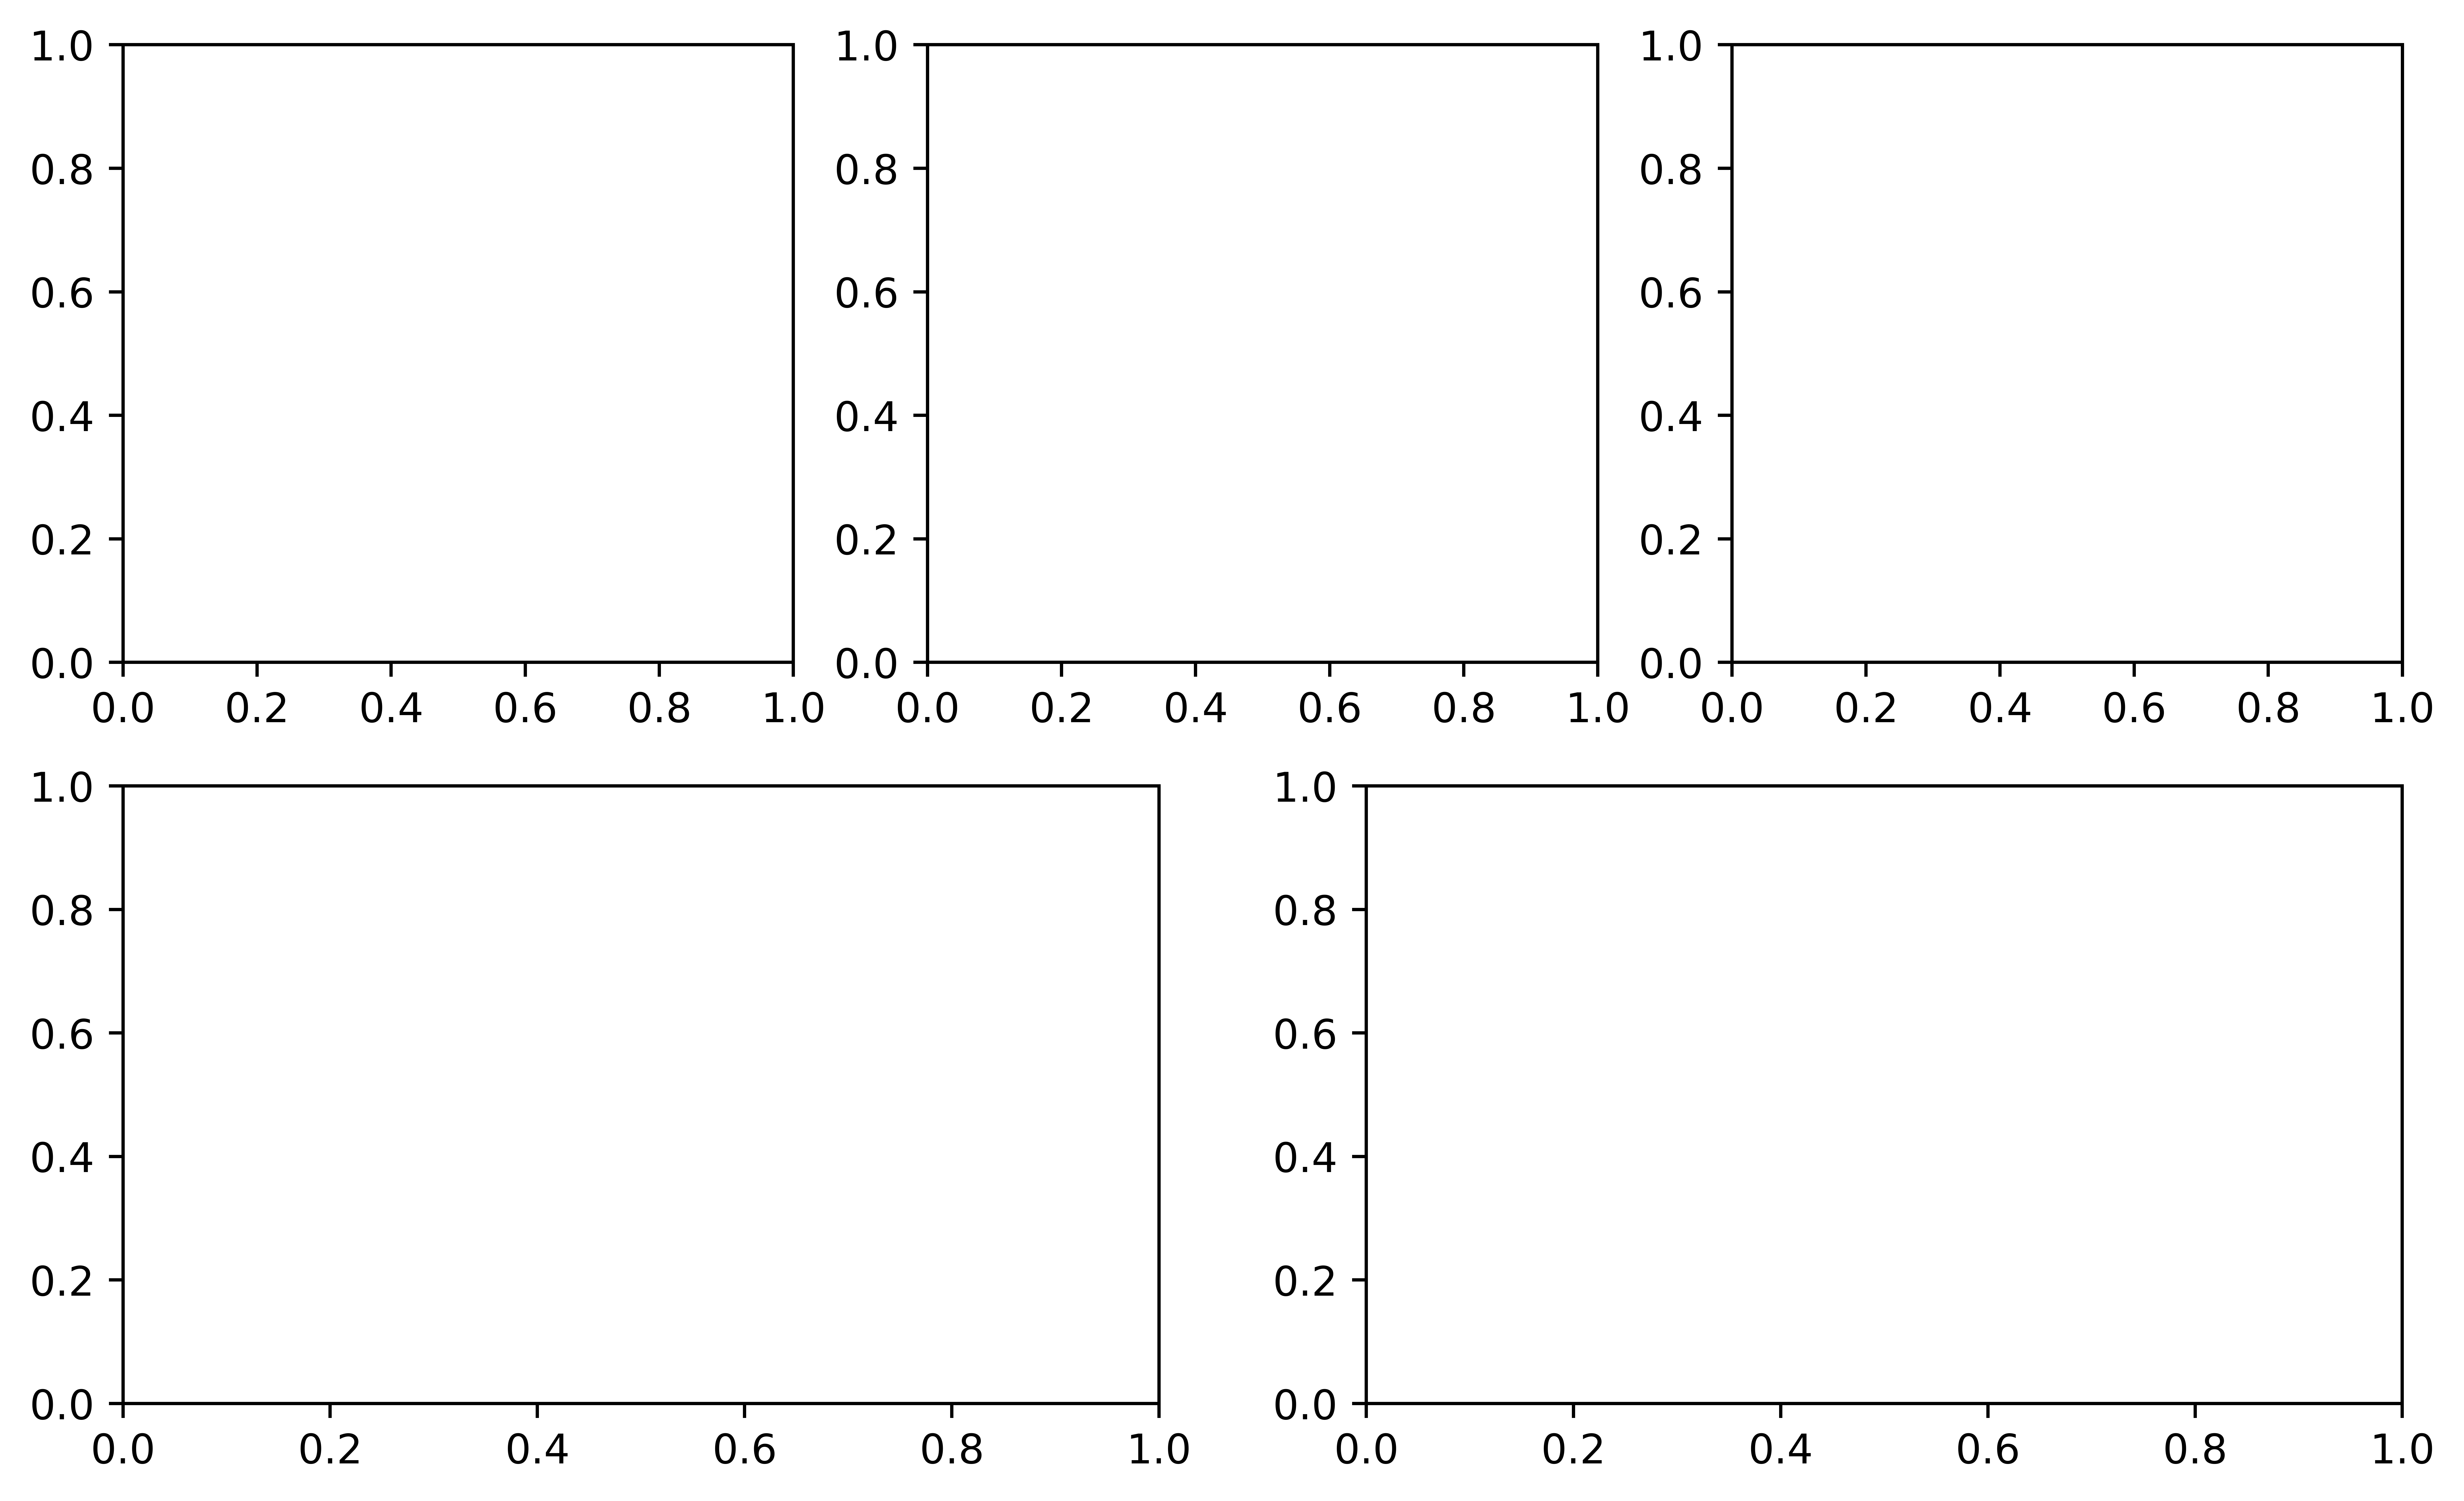

In [1]:
import matplotlib.pyplot as plt

#%%
fig = plt.figure(figsize=(10, 6), dpi=1080)

# 添加子图
for i in range(1, 4):
    fig.add_subplot(2, 3, i)
for i in range(3, 5):
    fig.add_subplot(2, 2, i)

### 不均匀子图绘制 fig.add_axes()

0.12
0.42
0.72
0.25
0.55


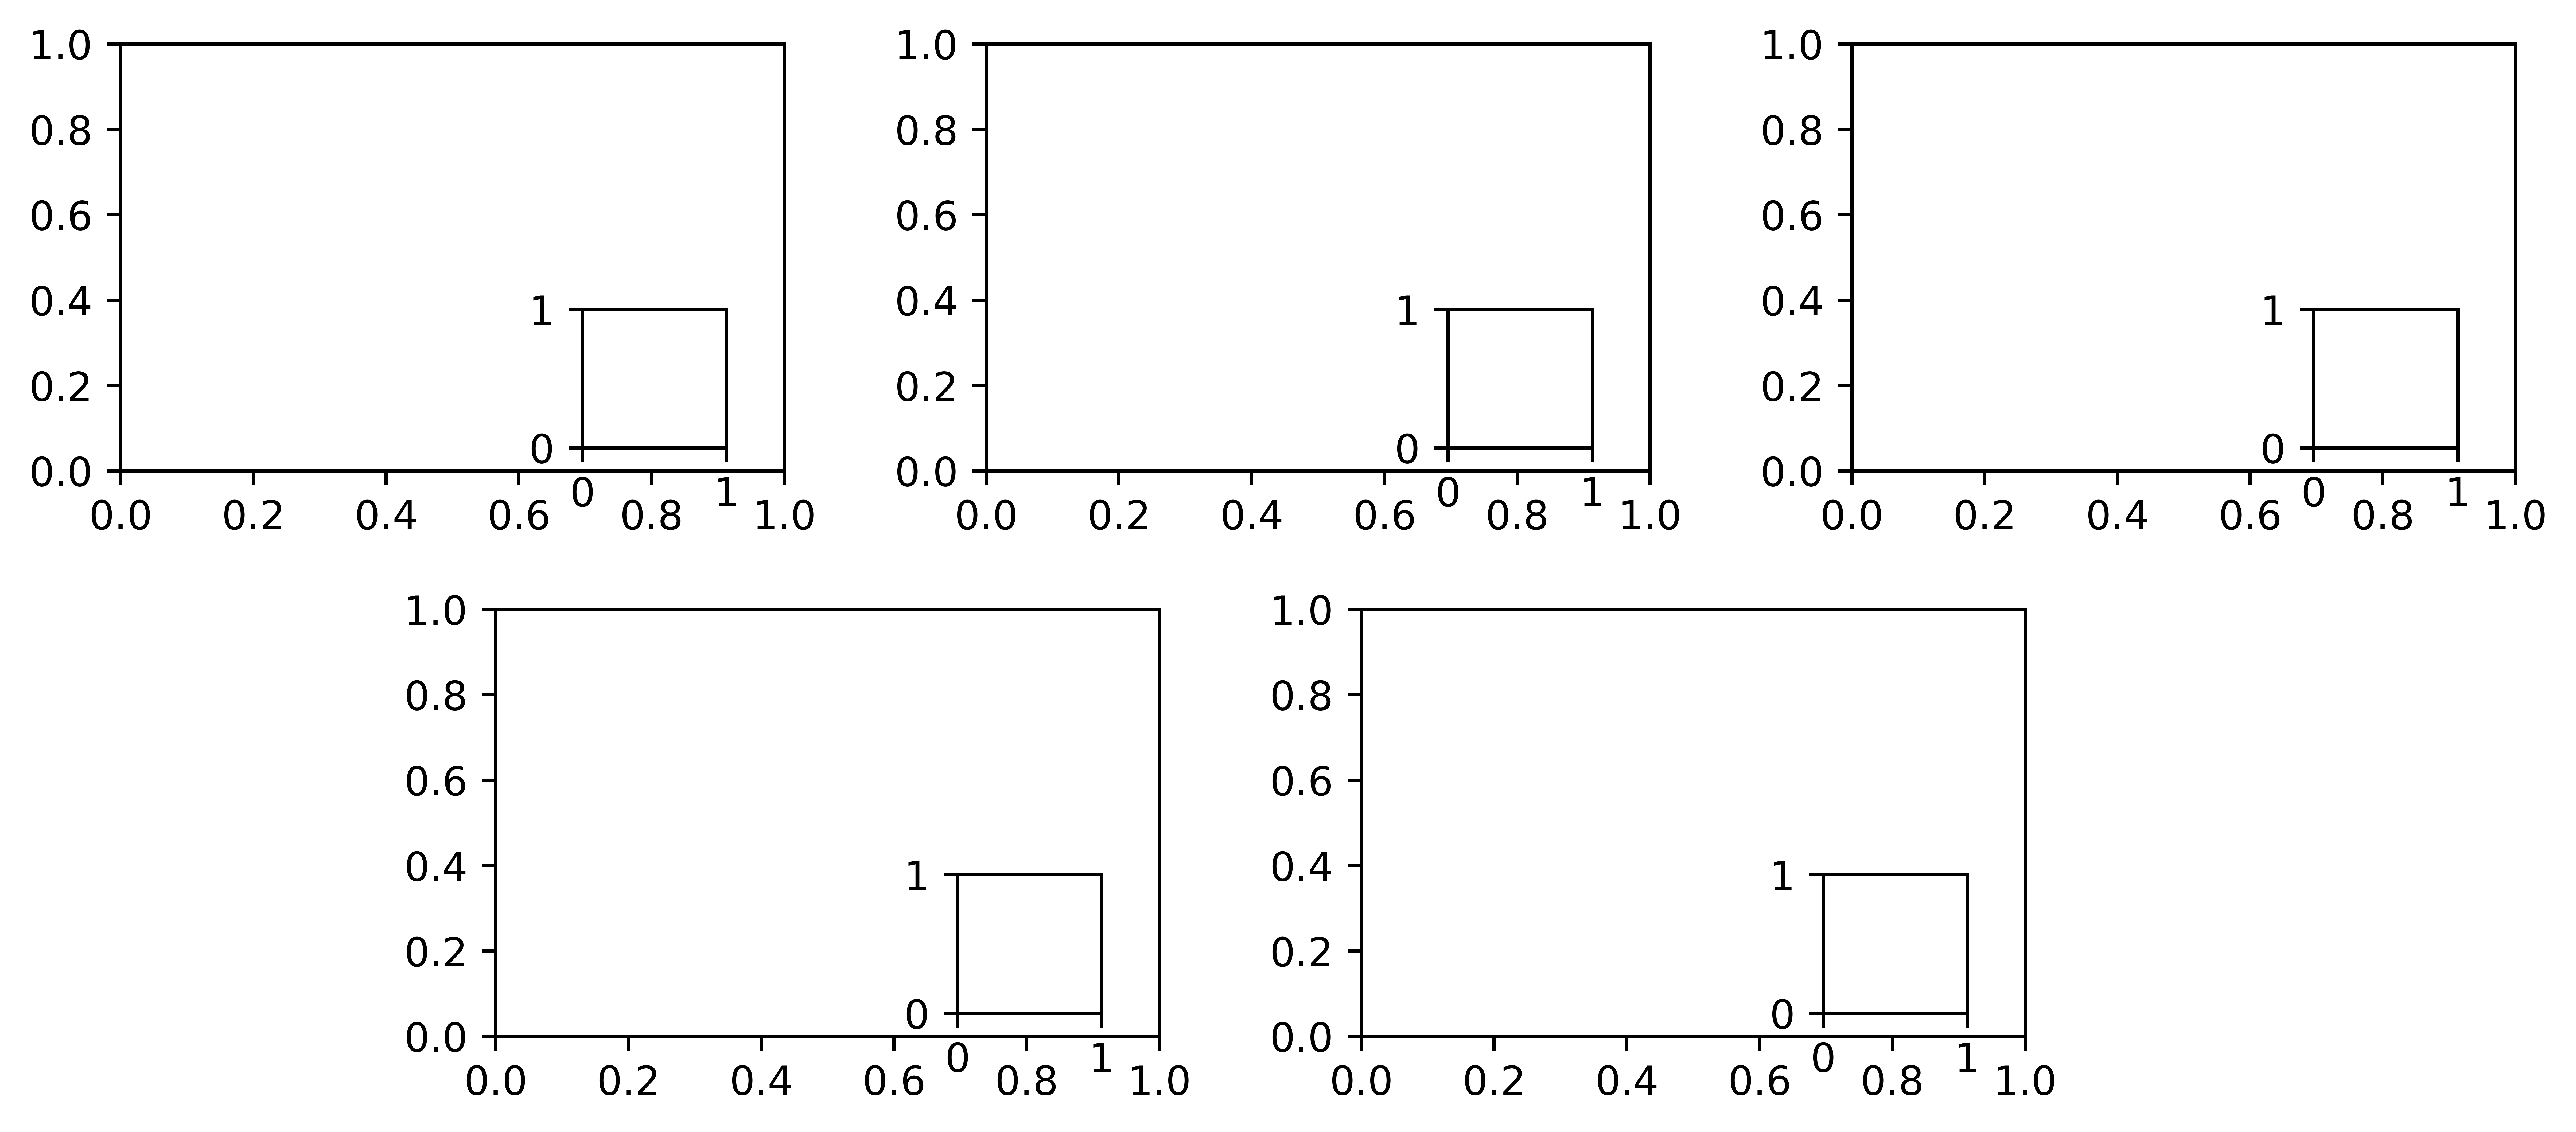

In [3]:
fig = plt.figure(figsize=(10, 4), dpi=1080)

# 添加子图 pos:[a, b, c, d]
wspace = 0.30
a, b, c, d = 0.12-wspace, 0.61, 0.23, 0.37
for i in range(3):
    a = a+wspace
    print(a)
    pos = [a, b, c, d]
    sub_pos = [a+0.16, b+0.02, 0.05, 0.12]
    ax = fig.add_axes(pos)
    sub_ax = fig.add_axes(sub_pos)
    
wspace = 0.30
a, b, c, d = 0.25-wspace, 0.12, 0.23, 0.37
for i in range(2):
    a = a+wspace
    print(a)
    pos = [a, b, c, d]
    sub_pos = [a+0.16, b+0.02, 0.05, 0.12]
    ax = fig.add_axes(pos)
    sub_ax = fig.add_axes(sub_pos)

### 不均匀子图绘制 gridspec

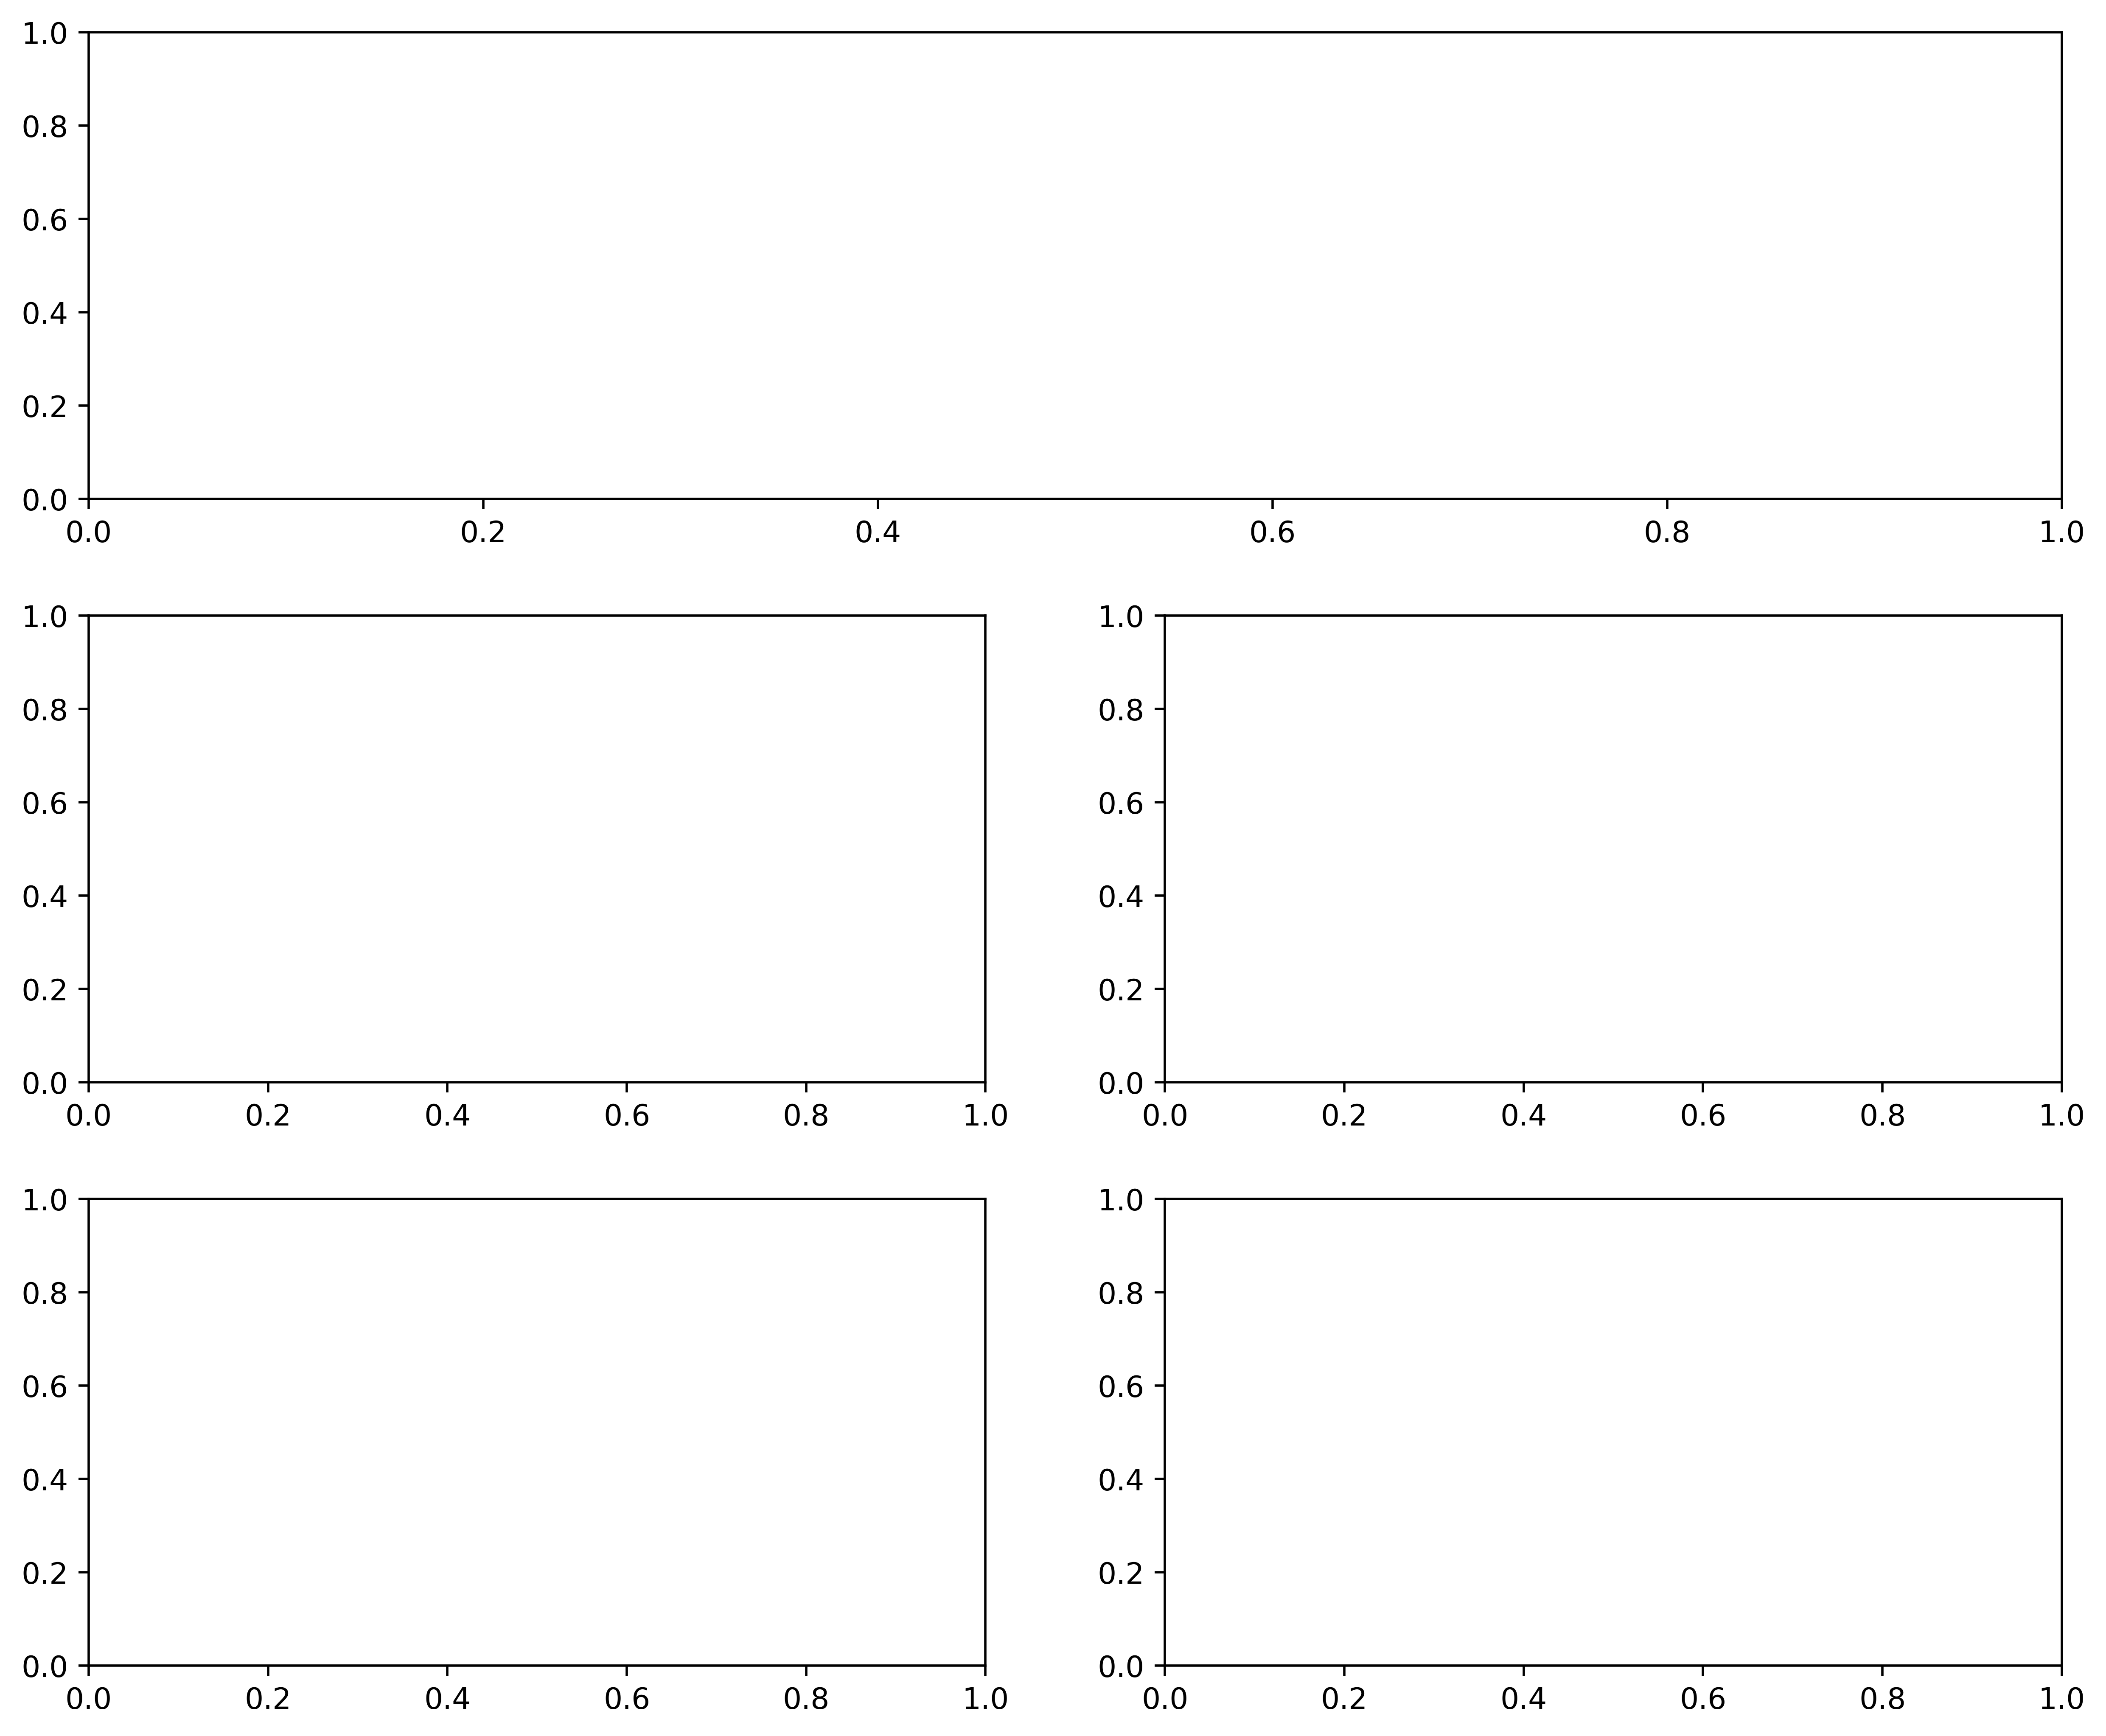

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig  = plt.figure(figsize=(12,10),dpi=500)   
fig.subplots_adjust(hspace=0.25)

gs0  = gridspec.GridSpec(3, 1, figure=fig)
gs00 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[0])
gs01 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[1])
gs02 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[2])

ax1 = fig.add_subplot(gs00[0, 0])
ax2 = fig.add_subplot(gs01[0, 0])
ax3 = fig.add_subplot(gs01[0, 1])
ax4 = fig.add_subplot(gs02[0, 0])
ax5 = fig.add_subplot(gs02[0, 1])

plt.show()

### 多子图 大+小 中国地图叠加南海小地图

In [ ]:
def make_map(fig, ax, shrink):
    # 打开边框
    ax.spines['geo'].set_visible(True)

    # 设置cfeature自带底图
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.8)

    # 设置shp文件
    shp_path1 = r'E:\SHP\cnmap\cnmap.shp'
    shp_path3 = r'E:/SHP/cnmap/river.shp'

    provinces = cfeature.ShapelyFeature(
        Reader(shp_path1).geometries(),
        ccrs.PlateCarree(),
        edgecolor='k',
        facecolor='none')

    yellow = cfeature.ShapelyFeature(
        Reader(shp_path3).geometries(),
        ccrs.PlateCarree(),
        edgecolor='k',
        facecolor='none')

    ax.add_feature(provinces, linewidth=1, zorder=3)
    ax.add_feature(yellow, linewidth=1, zorder=3)

    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())

    yticks = np.arange(20, 51, 10)
    xticks = np.arange(80, 141, 20)

    ax.set_yticks(yticks)
    ax.set_xticks(xticks)  # 需要显示的纬度
    ax.tick_params(labelsize=15)

    # 区域
    region = [70, 140, 15, 55]
    ax.set_extent(region, crs=ccrs.PlateCarree())

    # 设置网格点
    ylocs = list(yticks)
    xlocs = list(xticks)
    lb = ax.gridlines(draw_labels=True, ylocs=ylocs, xlocs=xlocs, x_inline=False, y_inline=False,
                      linewidth=1, color='lightgray', linestyle='--', alpha=0.8)  # alpha是透明度

    lb.top_labels = False
    lb.bottom_labels = False
    lb.right_labels = False
    lb.left_labels = False
    lb.xlabel_style = {'size': 15}  # 修改经纬度字体大小
    lb.ylabel_style = {'size': 15}

    # 添加南海
    sub_ax = fig.add_axes([0,0,1,1],projection=ccrs.PlateCarree()) 
    sub_ax.set_extent([105, 125, 0, 26])
    bbox     = ax.get_position()
    bbox_sub = sub_ax.get_position()
    ratio = bbox.height / bbox_sub.height * shrink
    ip=InsetPosition(ax,[1-((bbox_sub.width * ratio)/bbox.width), 0,(bbox_sub.width * ratio)/bbox.width, shrink])
    sub_ax.set_axes_locator(ip)
    sub_ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.8)

    return sub_ax



def Creat_figure(name1, name2, data, data2, data3, data4, levels, cmap, lat, lon, lat2, lon2, title):

    fig = plt.figure(figsize=(12, 4), dpi=1080)
    proj = ccrs.PlateCarree()

    fig.subplots_adjust(left=0.12, bottom=0.12, right=0.88,
                        top=0.9, wspace=0.1, hspace=0.05)

    lon, lat = np.meshgrid(lon, lat)
    lon2, lat2 = np.meshgrid(lon2, lat2)

    title_str = [f"(a) {name1} Spring", "(b) Summer",
                 "(c) Autumn", "(d) Winter"]
    
    title_str2 = [f"(e) {name2} Spring", "(f) Summer",
                 "(g) Autumn", "(h) Winter"]

    # 添加子图
    for i in range(4):
        ax = fig.add_subplot(2, 4, i+1, projection=proj)
        sub_ax = make_map(fig, ax, 0.4)
        cs = ax.contourf(lon, lat, data[i],
                          levels=levels, transform=ccrs.PlateCarree(),
                          cmap=cmap, extend="both", zorder=1, corner_mask=False)
        clip = clip_CHN(ax)
        # 添加掩膜路径，白化外部的分部
        for contour in cs.collections:
            contour.set_clip_path(clip)
        ax.set_title(f"{title_str[i]}", fontsize=12, loc="left")
        
        cs2 = sub_ax.contourf(lon2, lat2, data2[i],
                          levels=levels, transform=ccrs.PlateCarree(),
                          cmap=cmap, extend="both", zorder=1, corner_mask=False)
        clip = clip_CHN(sub_ax)
        for contour in cs2.collections:
            contour.set_clip_path(clip)
            
        if i >=1:
            ax.set_yticklabels([])
        ax.set_xticklabels([])
        
        
    ########################
    for i in range(4, 8):
        ax = fig.add_subplot(2, 4, i+1, projection=proj)
        sub_ax = make_map(fig, ax, 0.4)
        cs = ax.contourf(lon, lat, data3[i-4],
                          levels=levels, transform=ccrs.PlateCarree(),
                          cmap=cmap, extend="both", zorder=1, corner_mask=False)
        clip = clip_CHN(ax)
        # 添加掩膜路径，白化外部的分部
        for contour in cs.collections:
            contour.set_clip_path(clip)
        ax.set_title(f"{title_str2[i-4]}", fontsize=12, loc="left")
        
        cs2 = sub_ax.contourf(lon2, lat2, data4[i-4],
                          levels=levels, transform=ccrs.PlateCarree(),
                          cmap=cmap, extend="both", zorder=1, corner_mask=False)
        clip = clip_CHN(sub_ax)
        for contour in cs2.collections:
            contour.set_clip_path(clip)
        
        if i >= 5:
            ax.set_yticklabels([])

    ######
    cbar_ax = fig.add_axes([0.3, 0.01, 0.4, 0.03])
    cb = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')
    cb.ax.tick_params(labelsize=12)
    cb.set_label('Units: Celsius degree', fontsize=12)

    # plt.suptitle(f'{title}', fontsize=20)
    plt.savefig(
        rf'D:/Py-PY/WqW/Figure/{title}.jpg', bbox_inches='tight')
    plt.show()


### 大+小 提取画布位置，添加子图

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

fig = plt.figure(figsize=(4, 2), dpi=1080)
ax = fig.add_subplot(111)

bx_pos = [0, 0, 0.5, 0.5]
bx = fig.add_axes(bx_pos)
ip=InsetPosition(ax, bx_pos)
bx.set_axes_locator(ip)